In [1]:
import tensorflow as tf
# from tensorboard.plugins.hparams import api as hp
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
ratings = pd.read_pickle("tiny_selection_longform.pkl")

In [4]:
user_enc = LabelEncoder()
ratings['user'] = user_enc.fit_transform(ratings['user_id'].values)
n_users = ratings['user'].nunique()
n_users

2390

In [5]:
item_enc = LabelEncoder()
ratings['movie'] = item_enc.fit_transform(ratings['movie_id'].values)
n_movies = ratings['movie'].nunique()
n_movies

1648

In [6]:
nmovie_id = ratings.movie_id.nunique()
nuser_id = ratings.user_id.nunique()

In [7]:
X_train, X_test = train_test_split(ratings[['movie', 'user', 'rating_score']], test_size=0.2, random_state=42)

In [11]:
HP_NUM_UNITS = [16, 32, 64]
HP_DROPOUT = [.3, .4, .5]
HP_LEARNING_RATE = [.001, .01]
HP_REGULARIZER = ['l2', None]

In [16]:
def train_test_model(hparams):
    
    input_movies = keras.layers.Input(shape=[1])
    embed_movies = keras.layers.Embedding(nmovie_id+1, 15)(input_movies)
    movies_out = keras.layers.Flatten()(embed_movies)

    input_users = keras.layers.Input(shape=[1])
    embed_users = keras.layers.Embedding(nuser_id+1, 15)(input_users)
    users_out = keras.layers.Flatten()(embed_users)

    conc_layer = keras.layers.Concatenate()([movies_out, users_out])
    x = keras.layers.Dense(hparams['HP_NUM_UNITS'], 
                           activation='relu', 
                           kernel_regularizer=hparams['HP_REGULARIZER'])(conc_layer)
    dropout = x = keras.layers.Dropout(rate=hparams['HP_DROPOUT'], seed=42)(x)
    x_out = x = keras.layers.Dense(1, 
                                   activation='relu',
                                  kernel_regularizer=hparams['HP_REGULARIZER'])(x)

    model = keras.Model([input_movies, input_users], x_out)
    
    opt = tf.optimizers.Adam(learning_rate=hparams['HP_LEARNING_RATE'])
    model.compile(optimizer=opt, loss='mean_squared_error', metrics = keras.metrics.RootMeanSquaredError())
    
    hist = model.fit([X_train.movie, X_train.user], 
                 X_train.rating_score,  
                 batch_size=10000, epochs=10, validation_split=.2)

#     print(hist.history['val_mean_squared_error'])
    return hist

In [17]:
run_history = {}

session_num = 0

for num_units in HP_NUM_UNITS:
    for dropout_rate in HP_DROPOUT:
        for learning_rate in HP_LEARNING_RATE:
            for regularization in HP_REGULARIZER:
                hparams = {
                'HP_NUM_UNITS': num_units,
                'HP_DROPOUT': dropout_rate,
                'HP_LEARNING_RATE': learning_rate,
                'HP_REGULARIZER': regularization,
                }
                
                run_name = "run-{}".format(session_num)
                print("----Starting trial: {}".format(run_name))
                print(hparams)
                
                output = train_test_model(hparams,)
                run_history[run_name] = {
                    'params': hparams,
                    'output': output,
                }
                session_num += 1

----Starting trial: run-0
{'HP_NUM_UNITS': 16, 'HP_DROPOUT': 0.3, 'HP_LEARNING_RATE': 0.001, 'HP_REGULARIZER': 'l2'}
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 11.0775 - root_mean_squared_error: 3.2946 - val_loss: 10.9341 - val_root_mean_squared_error: 3.2730
Epoch 2/10
1/1 [==============================] - 0s 314ms/step - loss: 11.0639 - root_mean_squared_error: 3.2928 - val_loss: 10.9250 - val_root_mean_squared_error: 3.2718
Epoch 3/10
1/1 [==============================] - 0s 339ms/step - loss: 11.0510 - root_mean_squared_error: 3.2910 - val_loss: 10.9145 - val_root_mean_squared_error: 3.2704
Epoch 4/10
1/1 [==============================] - 0s 328ms/step - loss: 11.0368 - root_mean_squared_error: 3.2891 - val_loss: 10.9028 - val_root_mean_squared_error: 3.2689
Epoch 5/10
1/1 [==============================] - 0s 291ms/step - loss: 11.0161 - root_mean_squared_error: 3.2862 - val_loss: 10.8895 - val_root_mean_squared_error: 3.2671
Epoch 6/10
1/1 [==========

1/1 [==============================] - 0s 262ms/step - loss: 10.9786 - root_mean_squared_error: 3.2808 - val_loss: 10.8740 - val_root_mean_squared_error: 3.2651
----Starting trial: run-9
{'HP_NUM_UNITS': 16, 'HP_DROPOUT': 0.5, 'HP_LEARNING_RATE': 0.001, 'HP_REGULARIZER': None}
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 10.8125 - root_mean_squared_error: 3.2882 - val_loss: 10.6887 - val_root_mean_squared_error: 3.2694
Epoch 2/10
1/1 [==============================] - 0s 300ms/step - loss: 10.7981 - root_mean_squared_error: 3.2860 - val_loss: 10.6769 - val_root_mean_squared_error: 3.2676
Epoch 3/10
1/1 [==============================] - 0s 262ms/step - loss: 10.7807 - root_mean_squared_error: 3.2834 - val_loss: 10.6632 - val_root_mean_squared_error: 3.2655
Epoch 4/10
1/1 [==============================] - 0s 272ms/step - loss: 10.7628 - root_mean_squared_error: 3.2807 - val_loss: 10.6479 - val_root_mean_squared_error: 3.2631
Epoch 5/10
1/1 [=====================

1/1 [==============================] - 0s 218ms/step - loss: 10.4696 - root_mean_squared_error: 3.2357 - val_loss: 10.3793 - val_root_mean_squared_error: 3.2217
Epoch 10/10
1/1 [==============================] - 0s 194ms/step - loss: 10.4232 - root_mean_squared_error: 3.2285 - val_loss: 10.3431 - val_root_mean_squared_error: 3.2161
----Starting trial: run-18
{'HP_NUM_UNITS': 32, 'HP_DROPOUT': 0.4, 'HP_LEARNING_RATE': 0.01, 'HP_REGULARIZER': 'l2'}
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 11.1896 - root_mean_squared_error: 3.2952 - val_loss: 10.8887 - val_root_mean_squared_error: 3.2537
Epoch 2/10
1/1 [==============================] - 0s 327ms/step - loss: 11.0038 - root_mean_squared_error: 3.2713 - val_loss: 10.6610 - val_root_mean_squared_error: 3.2224
Epoch 3/10
1/1 [==============================] - 0s 222ms/step - loss: 10.7223 - root_mean_squared_error: 3.2319 - val_loss: 10.4221 - val_root_mean_squared_error: 3.1884
Epoch 4/10
1/1 [====================

1/1 [==============================] - 0s 155ms/step - loss: 5.5263 - root_mean_squared_error: 2.2850 - val_loss: 6.5343 - val_root_mean_squared_error: 2.4954
Epoch 9/10
1/1 [==============================] - 0s 272ms/step - loss: 4.3335 - root_mean_squared_error: 2.0065 - val_loss: 5.8090 - val_root_mean_squared_error: 2.3443
Epoch 10/10
1/1 [==============================] - 0s 208ms/step - loss: 3.2528 - root_mean_squared_error: 1.7145 - val_loss: 5.1136 - val_root_mean_squared_error: 2.1887
----Starting trial: run-27
{'HP_NUM_UNITS': 64, 'HP_DROPOUT': 0.3, 'HP_LEARNING_RATE': 0.01, 'HP_REGULARIZER': None}
Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 10.8340 - root_mean_squared_error: 3.2915 - val_loss: 10.3071 - val_root_mean_squared_error: 3.2105
Epoch 2/10
1/1 [==============================] - 0s 233ms/step - loss: 10.3860 - root_mean_squared_error: 3.2227 - val_loss: 9.8718 - val_root_mean_squared_error: 3.1419
Epoch 3/10
1/1 [===========================

1/1 [==============================] - 0s 180ms/step - loss: 6.6075 - root_mean_squared_error: 2.5705 - val_loss: 7.3526 - val_root_mean_squared_error: 2.7116
Epoch 8/10
1/1 [==============================] - 0s 189ms/step - loss: 5.5287 - root_mean_squared_error: 2.3513 - val_loss: 6.7010 - val_root_mean_squared_error: 2.5886
Epoch 9/10
1/1 [==============================] - 0s 183ms/step - loss: 4.3815 - root_mean_squared_error: 2.0932 - val_loss: 6.0354 - val_root_mean_squared_error: 2.4567
Epoch 10/10
1/1 [==============================] - 0s 143ms/step - loss: 3.3677 - root_mean_squared_error: 1.8351 - val_loss: 5.3785 - val_root_mean_squared_error: 2.3192


In [18]:
run_history.keys()

dict_keys(['run-0', 'run-1', 'run-2', 'run-3', 'run-4', 'run-5', 'run-6', 'run-7', 'run-8', 'run-9', 'run-10', 'run-11', 'run-12', 'run-13', 'run-14', 'run-15', 'run-16', 'run-17', 'run-18', 'run-19', 'run-20', 'run-21', 'run-22', 'run-23', 'run-24', 'run-25', 'run-26', 'run-27', 'run-28', 'run-29', 'run-30', 'run-31', 'run-32', 'run-33', 'run-34', 'run-35'])

In [19]:
run_history['run-0'].keys()

dict_keys(['params', 'output'])

In [20]:
run_history['run-0']['params']

{'HP_NUM_UNITS': 16,
 'HP_DROPOUT': 0.3,
 'HP_LEARNING_RATE': 0.001,
 'HP_REGULARIZER': 'l2'}

In [22]:
run_history['run-0']['output'].history

{'loss': [11.077495574951172,
  11.0639009475708,
  11.05101203918457,
  11.036822319030762,
  11.016063690185547,
  10.999794006347656,
  10.978511810302734,
  10.945921897888184,
  10.920418739318848,
  10.89529800415039],
 'root_mean_squared_error': [3.294569969177246,
  3.2927513122558594,
  3.291029453277588,
  3.2891032695770264,
  3.2861697673797607,
  3.283909320831299,
  3.2808761596679688,
  3.2761080265045166,
  3.272408962249756,
  3.2687575817108154],
 'val_loss': [10.93414306640625,
  10.92503547668457,
  10.914458274841309,
  10.902807235717773,
  10.889483451843262,
  10.874722480773926,
  10.857555389404297,
  10.838541030883789,
  10.817888259887695,
  10.79592514038086],
 'val_root_mean_squared_error': [3.2729885578155518,
  3.271834135055542,
  3.270449161529541,
  3.2688920497894287,
  3.2670705318450928,
  3.2650203704833984,
  3.2625937461853027,
  3.2598745822906494,
  3.256895065307617,
  3.2537057399749756]}

In [31]:
columns = ['num_units', 'dropout', 'learning_rate', 'regularizar', 
           'batch_size', 'n_epochs', 'train_mse', 'train_rootmse', 'val_mse', 'val_rootmse']

In [33]:
batch_size = 10000
n_epochs = 10

In [35]:
gridsearch_df = pd.DataFrame(columns=columns)

for n, key in enumerate(run_history.keys()):
    gridsearch_df.at[n, 'num_units'] = run_history[key]['params']['HP_NUM_UNITS']
    gridsearch_df.at[n, 'dropout'] = run_history[key]['params']['HP_DROPOUT']
    gridsearch_df.at[n, 'learning_rate'] = run_history[key]['params']['HP_LEARNING_RATE']
    gridsearch_df.at[n, 'regularizar'] = run_history[key]['params']['HP_REGULARIZER']
    gridsearch_df.at[n, 'batch_size'] = batch_size
    gridsearch_df.at[n, 'n_epochs'] = n_epochs
    gridsearch_df.at[n, 'train_mse'] = [run_history[key]['output'].history['loss']]
    gridsearch_df.at[n, 'train_rootmse'] = [run_history[key]['output'].history['root_mean_squared_error']]
    gridsearch_df.at[n, 'val_mse'] = [run_history[key]['output'].history['val_loss']]
    gridsearch_df.at[n, 'val_rootmse'] = [run_history[key]['output'].history['val_root_mean_squared_error']]
    

ValueError: Must have equal len keys and value when setting with an ndarray

In [23]:
import matplotlib.pyplot as plt

In [24]:
len(run_history.keys())

36

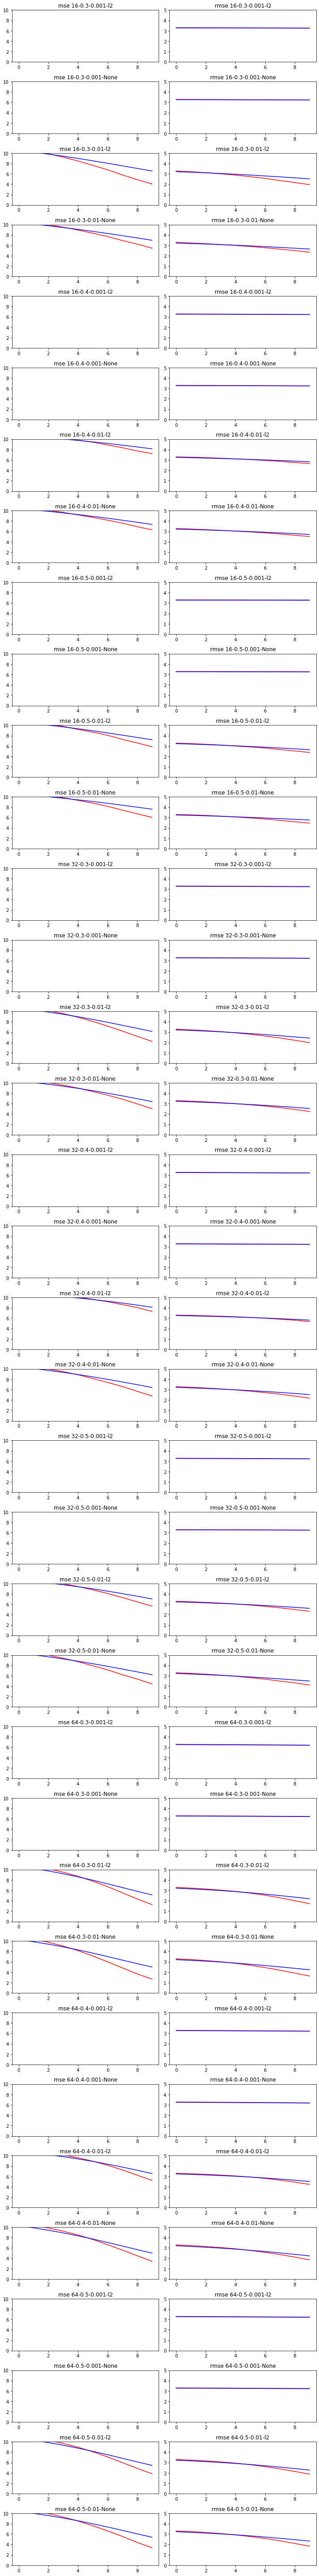

In [30]:
fig, axs = plt.subplots(ncols=2, nrows=len(run_history.keys()), figsize=(10, 80))

for n, key in enumerate(run_history.keys()):
    axs[n,0].plot(run_history[key]['output'].history['loss'], color='r')
    axs[n,0].plot(run_history[key]['output'].history['val_loss'], color='b')
    
    axs[n,1].plot(run_history[key]['output'].history['root_mean_squared_error'], color='r')
    axs[n,1].plot(run_history[key]['output'].history['val_root_mean_squared_error'], color='b')
    
    title_str = '-'.join(str(run_history[key]['params'][param]) for param in run_history[key]['params'].keys())
    
    axs[n,0].set_title("mse {}".format(title_str))
    axs[n,1].set_title("rmse {}".format(title_str))
    
    axs[n,0].set_ylim(0,10)
    axs[n,1].set_ylim(0,5)
    
plt.tight_layout()   
plt.show()

In [43]:
import json
def export_history(run_history, batch_size, n_epochs, save_path):
    history_dict = run_history.copy()
    for key in history_dict:
        if history_dict[key]['params']['HP_REGULARIZER']=='l2':
            
            history_dict[key]['params']['HP_REGULARIZER'] = .01
        else:
            try:
                history_dict[key]['params']['HP_REGULARIZER'] = history_dict[key]['params']['HP_REGULARIZER'].l2.tolist()
            except:
                pass   
        if type(history_dict[key]['params']['HP_REGULARIZER']) == np.ndarray:
            history_dict[key]['params']['HP_REGULARIZER'] = history_dict[key]['params']['HP_REGULARIZER'].tolist()
        history_dict[key]['params']['batch_size'] = batch_size
        history_dict[key]['params']['n_epochs'] = n_epochs
        
        try:
            history_dict[key]['output'] = history_dict[key]['output'].history
        except:
            history_dict[key]['output'] = history_dict[key]['output']
      
    with open(save_path, 'w') as f:
        json.dump(history_dict, f)
    
    return history_dict

new_dict = export_history(run_history, 10000, 10, "./run_history/model1.json")

In [44]:
new_dict['run-0']

{'params': {'HP_NUM_UNITS': 16,
  'HP_DROPOUT': 0.3,
  'HP_LEARNING_RATE': 0.001,
  'HP_REGULARIZER': 0.01,
  'batch_size': 10000,
  'n_epochs': 10},
 'output': {'loss': [11.077495574951172,
   11.0639009475708,
   11.05101203918457,
   11.036822319030762,
   11.016063690185547,
   10.999794006347656,
   10.978511810302734,
   10.945921897888184,
   10.920418739318848,
   10.89529800415039],
  'root_mean_squared_error': [3.294569969177246,
   3.2927513122558594,
   3.291029453277588,
   3.2891032695770264,
   3.2861697673797607,
   3.283909320831299,
   3.2808761596679688,
   3.2761080265045166,
   3.272408962249756,
   3.2687575817108154],
  'val_loss': [10.93414306640625,
   10.92503547668457,
   10.914458274841309,
   10.902807235717773,
   10.889483451843262,
   10.874722480773926,
   10.857555389404297,
   10.838541030883789,
   10.817888259887695,
   10.79592514038086],
  'val_root_mean_squared_error': [3.2729885578155518,
   3.271834135055542,
   3.270449161529541,
   3.26889204

In [39]:
run_history.keys()

dict_keys(['run-0', 'run-1', 'run-2', 'run-3', 'run-4', 'run-5', 'run-6', 'run-7', 'run-8', 'run-9', 'run-10', 'run-11', 'run-12', 'run-13', 'run-14', 'run-15', 'run-16', 'run-17', 'run-18', 'run-19', 'run-20', 'run-21', 'run-22', 'run-23', 'run-24', 'run-25', 'run-26', 'run-27', 'run-28', 'run-29', 'run-30', 'run-31', 'run-32', 'run-33', 'run-34', 'run-35'])

In [41]:
for key in run_history.keys():
    print(key, run_history[key]['params']['HP_REGULARIZER'])

run-0 l2
run-1 None
run-2 l2
run-3 None
run-4 l2
run-5 None
run-6 l2
run-7 None
run-8 l2
run-9 None
run-10 l2
run-11 None
run-12 l2
run-13 None
run-14 l2
run-15 None
run-16 l2
run-17 None
run-18 l2
run-19 None
run-20 l2
run-21 None
run-22 l2
run-23 None
run-24 l2
run-25 None
run-26 l2
run-27 None
run-28 l2
run-29 None
run-30 l2
run-31 None
run-32 l2
run-33 None
run-34 l2
run-35 None
